In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [9]:
x, sr = librosa.load('C:/Users/KIMO/Desktop/wewillrocku.wav')
onset_frames = librosa.onset.onset_detect(x, sr=sr, wait=1, pre_avg=1, post_avg=1, pre_max=1, post_max=1)
print(onset_frames) # frame numbers of estimated onsets





[  89  128  166  204  242  253  272  280  300  310  356  367  386  413
  424  432  443  452  470  489  508  557  576  614  641  660  709  719
  736  757  774  804  831  888  926  964 1021 1078 1116 1154 1192 1231
 1268 1307 1325 1420 1458 1469 1515 1534 1553 1572 1583 1602 1610 1640
 1686 1724 1762 1773 1792 1801 1830 1876 1914 1925 1952 1973 1990 2028
 2066 2104 2143 2180 2219 2294 2332 2370 2408 2447 2523 2598 2636 2674
 2685 2693 2704 2712 2750 2769 2788 2818 2826 2856 2875 2894 2940 2979
 2989 3054 3092 3141 3149 3160 3168 3179 3207 3243 3282 3320 3358 3396
 3434 3453 3510 3548 3586 3624 3662 3738 3814 3852 3890 3928 3966 4004
 4043 4061 4118 4156 4194 4232 4270 4308 4346 4365 4542 4611]


In [10]:
onset_times = librosa.frames_to_time(onset_frames)
print(onset_times)

[  2.06657596   2.9721542    3.85451247   4.73687075   5.61922902
   5.87464853   6.31582766   6.5015873    6.96598639   7.19818594
   8.26630385   8.52172336   8.96290249   9.58984127   9.84526077
  10.03102041  10.28643991  10.4954195   10.91337868  11.35455782
  11.79573696  12.93351474  13.37469388  14.25705215  14.88399093
  15.32517007  16.46294785  16.69514739  17.08988662  17.57750567
  17.9722449   18.66884354  19.29578231  20.61931973  21.501678
  22.38403628  23.7075737   25.03111111  25.91346939  26.79582766
  27.67818594  28.58376417  29.44290249  30.34848073  30.76643991
  32.9723356   33.85469388  34.11011338  35.17823129  35.61941043
  36.06058957  36.50176871  36.75718821  37.19836735  37.38412698
  38.08072562  39.14884354  40.03120181  40.91356009  41.16897959
  41.61015873  41.81913832  42.49251701  43.56063492  44.4429932
  44.6984127   45.32535147  45.81297052  46.20770975  47.09006803
  47.9724263   48.85478458  49.76036281  50.61950113  51.52507937
  53.26657596

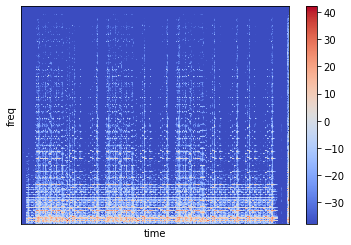

108.03201814058957


In [11]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
hop_length=512
librosa.display.specshow(logS,sr=sr,hop_length=hop_length )
plt.xlabel("time")
plt.ylabel("freq")
plt.colorbar()
plt.show()
print(librosa.get_duration(x, sr))



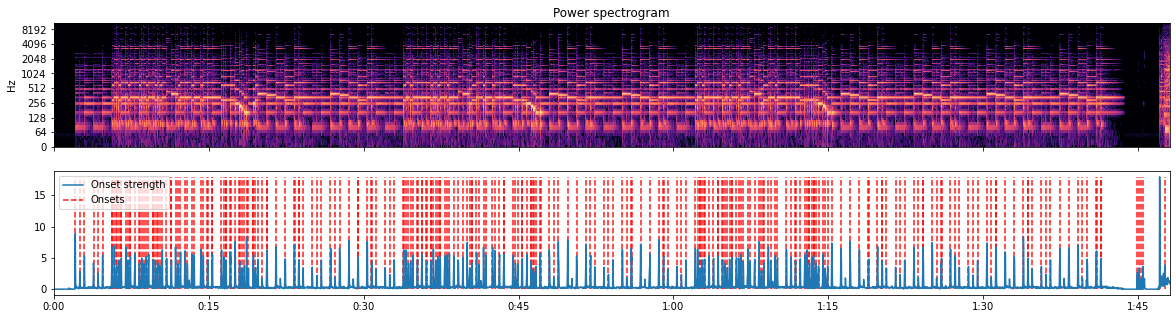

In [21]:
y, sr = librosa.load('C:/Users/KIMO/Desktop/wewillrocku.wav')

librosa.onset.onset_detect(y=y, sr=sr, units='time')

o_env = librosa.onset.onset_strength(y, sr=sr)

times = librosa.times_like(o_env, sr=sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

import matplotlib.pyplot as plt

D = np.abs(librosa.stft(y))


fig, ax = plt.subplots(nrows=2, sharex=True)
fig.set_size_inches(20, 5)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),

                         x_axis='time', y_axis='log', ax=ax[0])

ax[0].set(title='Power spectrogram')

ax[0].label_outer()

ax[1].plot(times, o_env, label='Onset strength')

ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,

           linestyle='--', label='Onsets')

ax[1].legend()


In [34]:
from pydub import AudioSegment

for i in range(0, len(onset_times)):
    if(i==(len(onset_times)-1)):
        t1 = (onset_times[i] * 1000)-1 #Works in milliseconds
        t2 = librosa.get_duration(x, sr)* 1000
    else: 
        t1 = onset_times[i] * 1000 #Works in milliseconds
        t2 = onset_times[i+1] * 1000
       
    newAudio = AudioSegment.from_wav("C:/Users/KIMO/Desktop/brb2.wav")
    newAudio = newAudio[t1:t2]
    newAudio.export(f"C:/Users/KIMO/Desktop/wav files/brb2_{i}.wav", format="wav") #Exports to a wav file in the current path.
   

